In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Column Information

The following columns are in our datasets:

## `iem_dallas_player_rounds.csv`
- `col_name`: `type` - Description

## `iem_dallas_players`

## `iem_dallas_matches`

# Data Gathering Methodology

## On Data Cleaning

We did not perform data cleaning on our dataset in this notebook since we gathered our data from our own scripts and manual scraping.

However, our scripts performed the following data cleaning steps:


# EDA

For our EDA, we will be exploring the different key metrics for each team, each member, and each map.

In [2]:
iem_dallas_df = pd.read_csv("iem_dallas.csv")
iem_dallas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     2970 non-null   int64  
 1   map_id                       2970 non-null   int64  
 2   round_id                     2970 non-null   int64  
 3   team_name                    2970 non-null   object 
 4   map_name                     2970 non-null   object 
 5   round_number                 2970 non-null   int64  
 6   round_ct_team                2970 non-null   object 
 7   round_first_site_hit         1610 non-null   object 
 8   round_site_hit_time          1610 non-null   float64
 9   round_bomb_plant_site        1460 non-null   object 
 10  player_planted_bomb          2970 non-null   bool   
 11  round_bomb_plant_time        1460 non-null   float64
 12  round_bomb_defuser           2970 non-null   bool   
 13  bomb_defuse_time  

### Teams - Exploratory Data Analysis
#### What are the key metrics for each team?

Total Matches

In [3]:
matches_per_team = iem_dallas_df.groupby('team_name')['match_id'].nunique().to_frame().reset_index()
matches_per_team.columns = ['team_name', 'matches_played']

print("Total matches played by each team:")
print(matches_per_team.sort_values(by='matches_played', ascending=False))


Total matches played by each team:
        team_name  matches_played
1          Aurora               2
0           3DMAX               1
2             BCG               1
3       FaZe Clan               1
4     GamerLegion               1
5          HEROIC               1
6          LEGACY               1
7            MOUZ               1
8             NRG               1
9     Team Liquid               1
10  Team Vitality               1


Total Rounds

In [4]:
rounds_per_team = iem_dallas_df.groupby('team_name')['round_id'].nunique().to_frame().reset_index()
rounds_per_team.columns = ['team_name', 'rounds_played']

print("Total rounds played by each team:")
print(rounds_per_team.sort_values(by= 'rounds_played',ascending=False))

Total rounds played by each team:
        team_name  rounds_played
1          Aurora             98
0           3DMAX             78
6          LEGACY             78
5          HEROIC             64
4     GamerLegion             45
10  Team Vitality             45
2             BCG             40
3       FaZe Clan             40
7            MOUZ             36
9     Team Liquid             36
8             NRG             34


Round Winrate

In [5]:
total_rounds_per_map_df = iem_dallas_df.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_df.columns = ['team_name', 'map_id', 'total_rounds']

total_round_wins_df = iem_dallas_df.loc[((iem_dallas_df['team_name'] == iem_dallas_df['round_ct_team']) & (iem_dallas_df['round_result'] == 'CT')) | ((iem_dallas_df['team_name'] != iem_dallas_df['round_ct_team']) & (iem_dallas_df['round_result'] == 'T'))]
total_round_wins_per_map = total_round_wins_df.groupby(['team_name', 'map_id'])['round_id'].nunique().to_frame().reset_index()

total_round_wins_per_map.columns
total_round_wins_per_map
#winrate_df = pd.merge(total_rounds_per_map_df, total_round_wins_per_map, on='team_name')
#winrate_df['win_rate_percent'] = winrate_df['round_wins'] / winrate_df['total_rounds'] * 100

#winrate_df 
#total_round_wins_per_map
#winrate_df.boxplot(column='win_rate_percent', by='team_name', figsize=(12, 6))

,team_name,map_id,round_id
0,3DMAX,20,22
1,3DMAX,21,6
2,3DMAX,22,13
3,Aurora,15,12
4,Aurora,16,7
5,Aurora,17,6
6,Aurora,27,10
7,Aurora,28,12
8,BCG,18,11
9,BCG,19,5


Average Kills per Round

Text(0.5, 1.0, 'Average Player Kills per Map by Team')

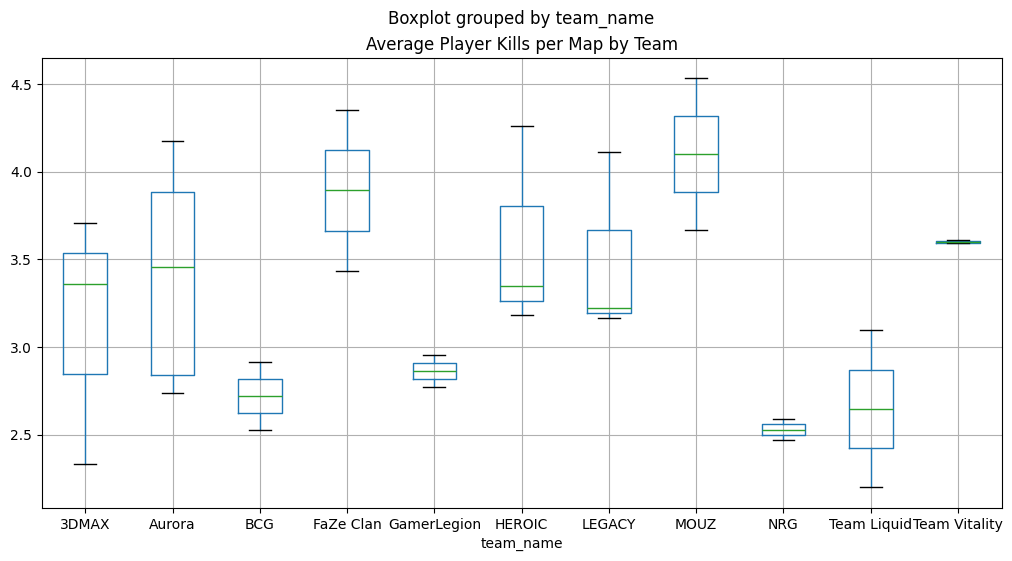

In [6]:
kills_per_map_per_team_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_kills'].sum().to_frame().reset_index()


ave_kills_per_map_per_team_df = pd.merge(kills_per_map_per_team_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_kills_per_map_per_team_df['average_player_kills_per_map'] = ave_kills_per_map_per_team_df['player_kills'] / ave_kills_per_map_per_team_df['total_rounds']


ave_kills_per_map_per_team_df.boxplot('average_player_kills_per_map', by='team_name', figsize=(12, 6))
plt.pyplot.title('Average Player Kills per Map by Team')


Average Deaths per Round

In [7]:
total_deaths_per_team_df = iem_dallas_df.loc[iem_dallas_df['player_died'] == True].groupby('team_name')['player_died'].count().to_frame()
total_deaths_per_team_df = total_deaths_per_team_df.rename(columns={'player_died': 'player_deaths'})

deaths_per_round_average_df = pd.merge(total_deaths_per_team_df, rounds_per_team, on='team_name')
deaths_per_round_average_df['average_deaths_per_round'] = deaths_per_round_average_df['player_deaths'] / deaths_per_round_average_df['rounds_played']
deaths_per_round_average_df.sort_values(by='average_deaths_per_round', ascending=False, inplace=True)
deaths_per_round_average_df.reset_index(drop=True, inplace=True)

deaths_per_round_average_df[['team_name', 'average_deaths_per_round']]


,team_name,average_deaths_per_round
0,NRG,4.058824
1,Team Liquid,4.055556
2,BCG,3.850000
3,GamerLegion,3.600000
4,3DMAX,3.487179
5,LEGACY,3.333333
6,Aurora,3.265306
7,HEROIC,3.015625
8,Team Vitality,2.866667
9,FaZe Clan,2.750000


Number of rounds as CT

In [8]:
rounds_as_ct_df = iem_dallas_df.loc[iem_dallas_df['round_ct_team'] == iem_dallas_df['team_name']]
rounds_as_ct_df = rounds_as_ct_df.groupby('team_name')['round_id'].nunique().to_frame().reset_index()
rounds_as_ct_df.columns = ['team_name', 'ct_rounds_played']
rounds_as_ct_df.sort_values(by='ct_rounds_played', ascending=False, inplace=True)

rounds_as_ct_df


,team_name,ct_rounds_played
1,Aurora,50
6,LEGACY,42
0,3DMAX,36
5,HEROIC,31
3,FaZe Clan,26
10,Team Vitality,23
4,GamerLegion,22
9,Team Liquid,22
8,NRG,17
2,BCG,14


Number of rounds as T

In [9]:
rounds_as_t_df = iem_dallas_df.loc[iem_dallas_df['round_ct_team'] != iem_dallas_df['team_name']]
rounds_as_t_df = rounds_as_t_df.groupby('team_name')['round_id'].nunique().to_frame().reset_index()
rounds_as_t_df.columns = ['team_name', 't_rounds_played']
rounds_as_t_df.sort_values(by='t_rounds_played', ascending=False)

rounds_as_t_df


,team_name,t_rounds_played
0,3DMAX,42
1,Aurora,48
2,BCG,26
3,FaZe Clan,14
4,GamerLegion,23
5,HEROIC,33
6,LEGACY,36
7,MOUZ,22
8,NRG,17
9,Team Liquid,14


Average Flashes per Game

<Axes: title={'center': 'average_flashes_per_map'}, xlabel='team_name'>

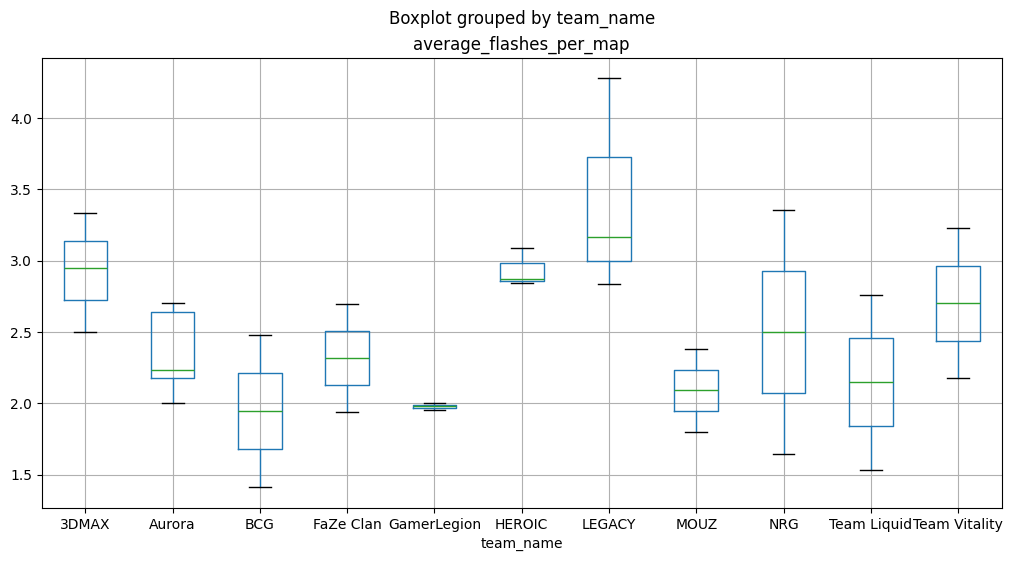

In [ ]:
flashes_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_flashes_used'].sum()

ave_flashes_per_map_per_team_df = pd.merge(flashes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_flashes_per_map_per_team_df['average_flashes_per_map'] = ave_flashes_per_map_per_team_df['player_flashes_used'] / ave_flashes_per_map_per_team_df['total_rounds']

ave_flashes_per_map_per_team_df.boxplot('average_flashes_per_map', by='team_name', figsize=(12, 6))



In [ ]:
flashes_per_game_df = iem_dallas_df.groupby(['team_name', 'map_id'])['player_flashes_used'].sum()

ave_flashes_per_map_per_team_df = pd.merge(flashes_per_game_df, total_rounds_per_map_df, on=['team_name', 'map_id'])
ave_flashes_per_map_per_team_df['average_flashes_per_map'] = ave_flashes_per_map_per_team_df['player_flashes_used'] / ave_flashes_per_map_per_team_df['total_rounds']

ave_flashes_per_map_per_team_df.boxplot('average_flashes_per_map', by='team_name', figsize=(12, 6))


# AI Disclaimer